In [39]:
import sys
sys.path.append("c:\\Users\\Lenovo\\myFiles\\nauka\\studia\\sem6\\wybrane zagadnienia sztucznej inteligencji\\laby\\analiza_danych")

In [40]:
import matplotlib.pyplot as plt

from corrected_app.general.data_processing import denormalize_data
from corrected_app.general.distance_calculation import get_euclidean_distance, get_manhattan_distance
from corrected_app.general.results_analysis import get_cluster_size, get_avg_distance_from_centroid_in_a_cluster, get_max_distance_from_centroid_in_a_cluster
from corrected_app.top_baby_names.top_baby_names_loop import top_baby_names_loop
from corrected_app.top_baby_names.top_baby_names_normalization import top_baby_names_denormalize_row

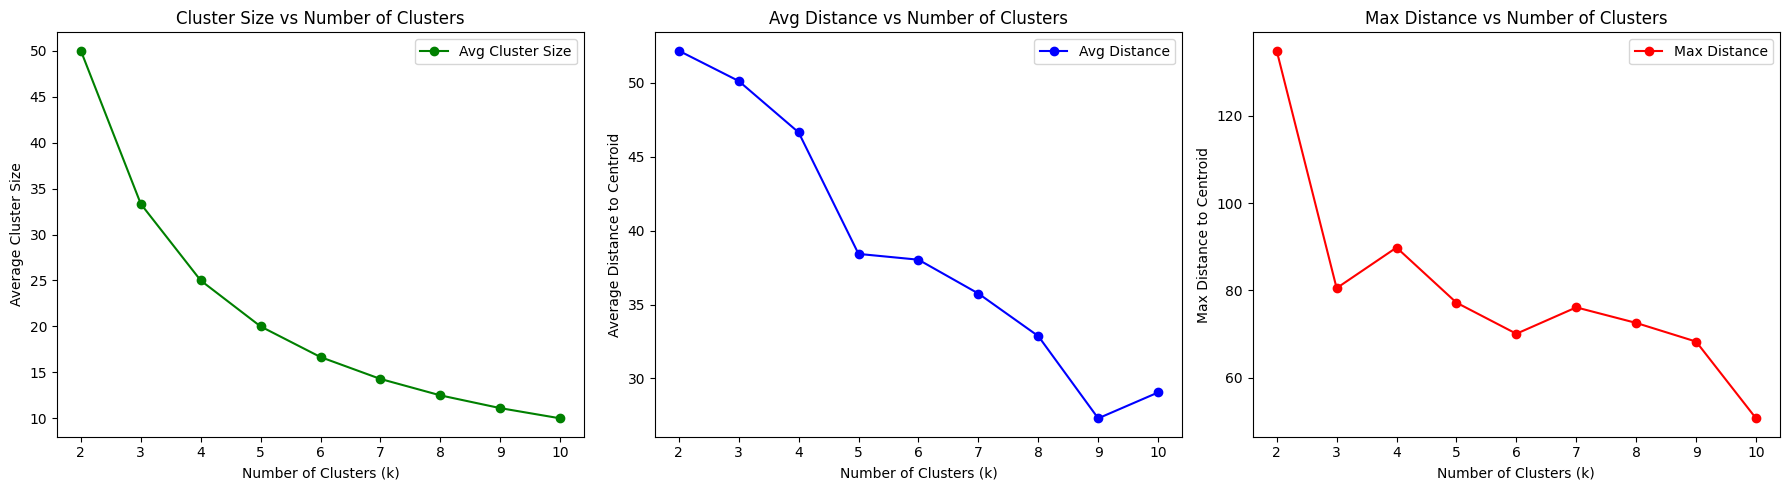

In [42]:
# results for different number of clusters

results = []

for k in range(2, 11):
    clusters, centroids = top_baby_names_loop(no_of_iterations=10, no_of_clusters=k, calculate_distance_function=get_euclidean_distance)
    
    cluster_sizes = [get_cluster_size(cluster) for cluster in clusters]
    avg_distances = [get_avg_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]
    max_distances = [get_max_distance_from_centroid_in_a_cluster(cluster, centroids[i], [1], get_euclidean_distance) for i, cluster in enumerate(clusters)]

    results.append({
        "k": k,
        "avg_cluster_size": sum(cluster_sizes) / len(cluster_sizes),
        "avg_distance": sum(avg_distances) / len(avg_distances),
        "max_distance": max(max_distances)
    })

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
ks = [res["k"] for res in results]

# avg cluster size vs number of clusters
avg_cluster_sizes = [res["avg_cluster_size"] for res in results]
axs[0].plot(ks, avg_cluster_sizes, marker='o', linestyle='-', color='g', label="Avg Cluster Size")
axs[0].set_xlabel("Number of Clusters (k)")
axs[0].set_ylabel("Average Cluster Size")
axs[0].set_title("Cluster Size vs Number of Clusters")
axs[0].legend()

# avg distance to centroid vs number of clusters
avg_distances = [res["avg_distance"] for res in results]
axs[1].plot(ks, avg_distances, marker='o', linestyle='-', color='b', label="Avg Distance")
axs[1].set_xlabel("Number of Clusters (k)")
axs[1].set_ylabel("Average Distance to Centroid")
axs[1].set_title("Avg Distance vs Number of Clusters")
axs[1].legend()

# max distance to centroid vs number of clusters
max_distances = [res["max_distance"] for res in results]
axs[2].plot(ks, max_distances, marker='o', linestyle='-', color='r', label="Max Distance")
axs[2].set_xlabel("Number of Clusters (k)")
axs[2].set_ylabel("Max Distance to Centroid")
axs[2].set_title("Max Distance vs Number of Clusters")
axs[2].legend()

plt.tight_layout()
plt.show()
